In [ ]:
2: Implementing Feedforward neural networks with Keras and TensorFlow
a. Import the necessary packages
b. Load the training and testing data (CIFAR)
c. Define the network architecture using Keras
d. Train the model using SGD
e. Evaluate the network
f. Plot the training loss and accuracy

dataset: CIFAR

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data_dir = 'cifar-10-img/train'
test_data_dir = 'cifar-10-img/test'

In [3]:
# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
train_batch_size = 20000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=train_batch_size,
    class_mode='sparse', 
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=test_batch_size,
    class_mode='sparse', 
    shuffle=True,
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [4]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
# number of classes
K = len(set(y_train))
# calculate total number of classes 
# for output layer
print("number of classes:", K)
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)

number of classes: 10


In [7]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.4105 - loss: 1.7350 - val_accuracy: 0.4710 - val_loss: 1.5650
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.5664 - loss: 1.2133 - val_accuracy: 0.6140 - val_loss: 1.1267
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.6355 - loss: 1.0303 - val_accuracy: 0.6380 - val_loss: 1.0276
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.6823 - loss: 0.8999 - val_accuracy: 0.6670 - val_loss: 0.9528
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.7244 - loss: 0.7723 - val_accuracy: 0.6470 - val_loss: 1.0187
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.7631 - loss: 0.6796 - val_accuracy: 0.6560 - val_loss: 0.9409
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.7923 - loss: 0.6028 - val_accuracy: 0.6930 - val_loss: 0.9055
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8133 - loss: 0.5286 - 

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7210 - loss: 0.8665
Loss:  0.8664905428886414
Accuracy:  0.7210000157356262


In [9]:
import matplotlib.pyplot as plt
y = to_categorical(y_test)
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [10]:
labels = list(test_generator.class_indices.keys())

Actual Number:  cat
Predicted Number:  bird


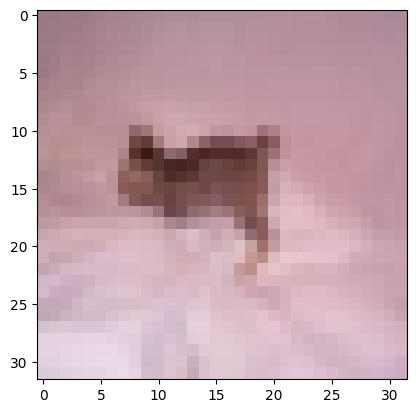

In [11]:
n = 10
plt.imshow(x_test[n])
print("Actual Number: ",labels[np.argmax(y[n])])
print("Predicted Number: ", labels[np.argmax(predicted_value[n])])

In [12]:
history = history.history
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

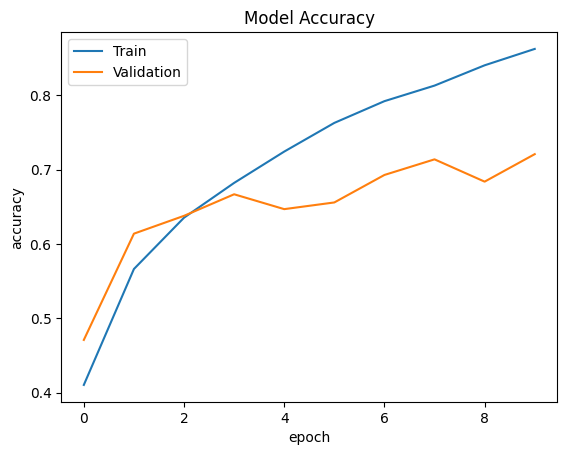

In [13]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

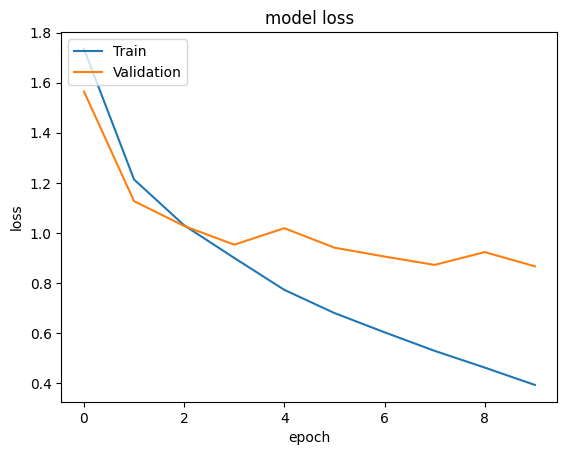

In [14]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

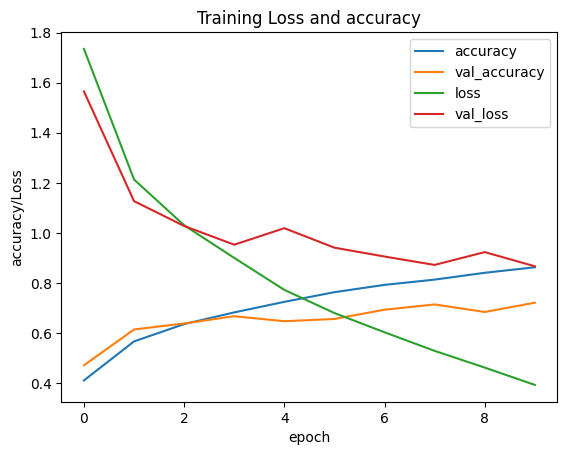

In [15]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])